# WEEK6 실전 분석
## 와인 품질 측정하기
데이터 원작자 소개 UCI https://archive.ics.uci.edu/ml/index.php

---

## 문제 정의
와인의 화학 측정 데이터로 부터 기존에는 미각, 후각으로 측정하던 와인의 품질을 추정한다.

## 가설 수립
산성도, 알코올 도수 등 정량적으로 측정하는 화학데이터로 특징 데이터를 구성한 후 머신러닝을 통해 미각 측정 없이 와인의 품질을 추정할 수 있다.

## 목표
화학 특징 데이터를 입력받아 0~10 사이의 숫자로 와인 품질을 추정해낸다.

---
## 데이터 구성

**11개 입력 데이터**
1. fixed acidity 
1. volatile acidity 
1. citric acid 
1. residual sugar 
1. chlorides 
1. free sulfur dioxide 
1. total sulfur dioxide 
1. density 
1. pH 
1. sulphates 
1. alcohol

**출력 데이터** quality(와인 품질)  
**개수** 1,599개

## 데이터 다운로드
[데이터 다운로드](http://bit.ly/코알라_DS_6주차_데이터)
-교육적 의도로 기존 DATA에서 일부 변형되었습니다.

---
# 분석 가이드
### [단계1. 데이터 불러오기](#1.-데이터-불러오기)
### [단계2. EDA & Feature Engineering](#2.-EDA-&-Feature-Engineering)
### [단계3. Dataset 구성하기](#3.-Dataset-구성하기)
### [단계4. 모델링과 학습](#4.-모델링과-학습)
### [단계5. 모델 검증](#5.-모델-검증)

---
# 1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4.617195
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.782987
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.868157
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.929590
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4.714931


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.622542
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.858455
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.552934
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,4.982849
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.568807
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.189646
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.456527


---
# 2. EDA & Feature Engineering

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

/Volumes/External1/Envs/Conda/ds/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


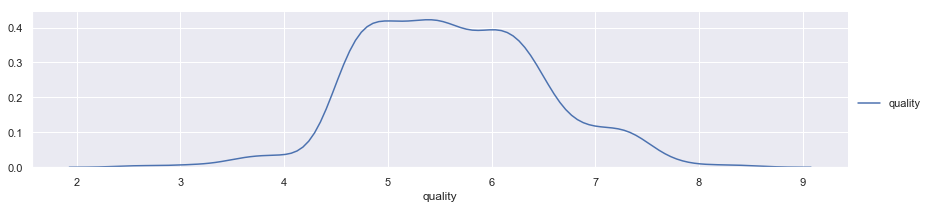

In [5]:
facet = sns.FacetGrid(df, aspect=4)
facet.map(sns.kdeplot, 'quality')
facet.add_legend()

plt.show()

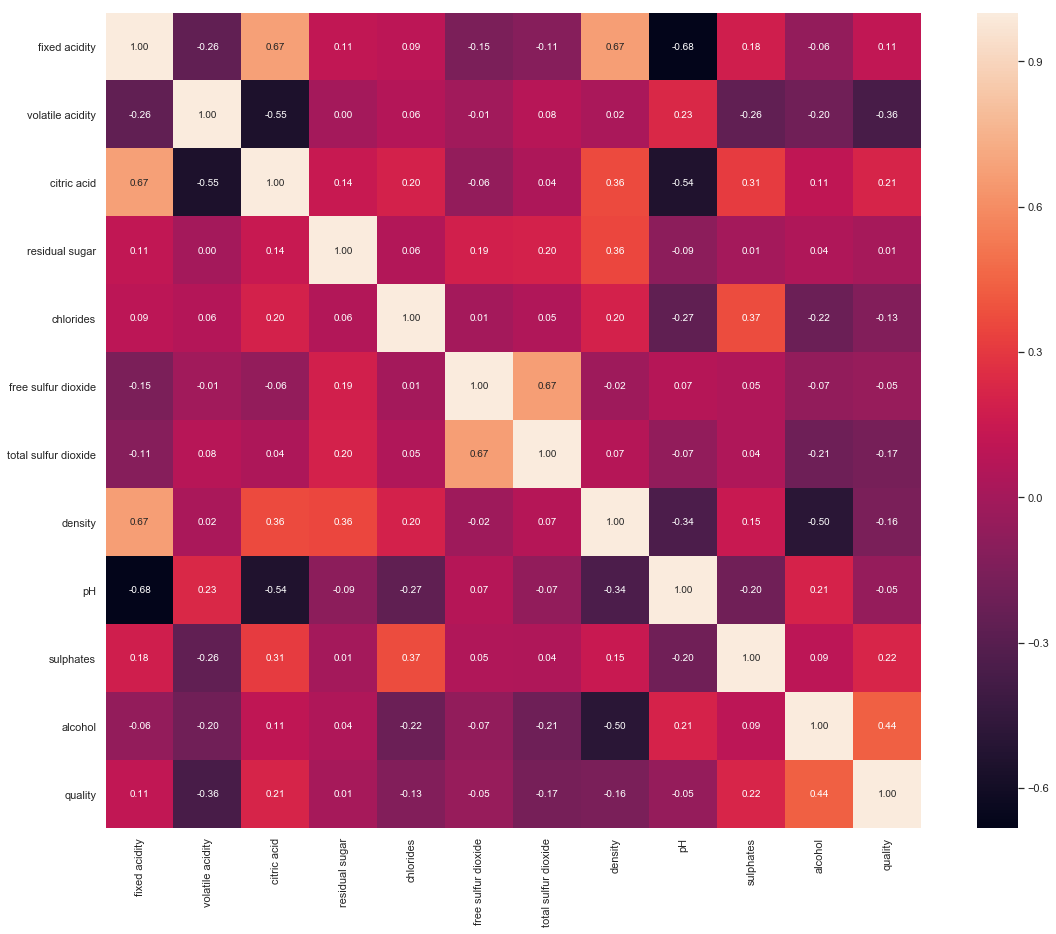

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)

plt.show()

---
# 3. Dataset 구성하기

In [7]:
train_data = df.drop(['quality'], axis=1)
target_data = df['quality']

print(train_data.shape, target_data.shape)

(1599, 11) (1599,)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2) 

print(train_data.shape, x_train.shape, x_test.shape)

(1599, 11) (1279, 11) (320, 11)


---
# 4. 모델링과 학습

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)

In [10]:
# train 데이터 학습
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 0.9058803652872575


# 5. 모델 검증

In [12]:
y_predict = forest.predict(x_test)
print('test set accuracy:', forest.score(x_test, y_test))

test set accuracy: 0.34903638095126205


In [13]:
# 예측값과 실제 답을 비교해보기
comparison = pd.DataFrame(y_test)

comparison['my_predict'] = y_predict
comparison.head()

,quality,my_predict
393,5.402680,5.141470
1446,5.468786,5.305034
850,4.780490,5.431894
608,6.479035,5.319725
589,6.551132,6.294303


---
# 과제
## 더 좋은 평가지표 고안하기 - 카테고리화

In [14]:
comparison = round(comparison) # 내용물을 모두 반올림하기
comparison.head()

,quality,my_predict
393,5.0,5.0
1446,5.0,5.0
850,5.0,5.0
608,6.0,5.0
589,7.0,6.0


In [15]:
evaluation = (comparison['quality'] == comparison['my_predict']) # 예측결과와 실제답이 같은지 확인
evaluation.head() # 예측과 실제답이 같을 경우만 True

393      True
1446     True
850      True
608     False
589     False
dtype: bool

In [16]:
success = (evaluation == True).sum() # 예측 성공건 수 카운팅
failure = (evaluation == False).sum() # 예측 실패건 수 카운팅

print(success / (success + failure)) # 예측 성공률 출력

0.671875


## 심화
### 평가 함수 만들기
'함수' 부분에 대한 파이썬 지식이 선행되어야 합니다. 이 커리큘럼에서는 다루지 않았습니다.

In [17]:
def my_score(result, answer):
    comparison = pd.DataFrame(answer)

    comparison['my_predict'] = result
    comparison = round(comparison)
    
    evaluation = (comparison['quality'] == comparison['my_predict'])
    success = (evaluation == True).sum()
    failure = (evaluation == False).sum()
    
    return (success / (success + failure))

predict_train = forest.predict(x_train)
predict_test = forest.predict(x_test)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test)) # 바로 위에서 구한 예측성공률과 같은 값이 나온다

(category) train set accuracy 0.9241594996090696
(category) test set accuracy 0.671875


---
# 참고(다른 모델들)

## LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

predict_train = lr.predict(x_train)
predict_test = lr.predict(x_test)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test))

(category) train set accuracy 0.5926505082095387
(category) test set accuracy 0.5875


## Polynomial Linear Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                      LinearRegression()).fit(x_train, y_train)
model.fit(x_train, y_train)

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test))

(category) train set accuracy 0.617670054730258
(category) test set accuracy 0.56875


---
# Challenge - Support Vector Machine 사용해보기
## SVR

In [20]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test))

(category) train set accuracy 0.7857701329163409
(category) test set accuracy 0.58125


/Volumes/External1/Envs/Conda/ds/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
